<a href="https://colab.research.google.com/github/rafa-fortes/CursoDS_Mentorama/blob/main/Modulo_12_Modelos_de_Arvores_e_Ensembles_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Modelos baseados em árvores

<br>

Ao longo do módulo, discutimos bastante as árvores de decisão, bem como ensemble de árvores, como Random Forest e algoritmos do tipo boosting.

Esses __ensembles acabam tendo muitos hiperparâmetros;__ escolhe-los de forma manual acaba sendo muito custoso e tedioso. 

Neste exercício, vamos discutir a respeito da metolodia __grid-search__, que otimiza essa busca de hiperparâmetros.

Considere o dataset abaixo (basta executar as células):

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [ ]:
#problema de regressão

X, y = load_diabetes().data, load_diabetes().target
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.25, random_state = 42)
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(331, 10) (111, 10) (331,) (111,)


Imagine que queremos testar - usando cross-validation - várias instâncias de Random Forests: com 10 árvores, com 100 árvores, com 1000 árvores, com profundidade máxima 1, 5, 10. 

Como podemos proceder? O código abaixo exemplifica um jeito:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

for n_est in [10,100,100]:
    for prof in [1,5,10]:
        rf = RandomForestRegressor(n_estimators=n_est, max_depth=prof)
        cvres = cross_val_score(estimator=rf, X = Xtrain, y = ytrain, cv = 3, scoring='r2')
        print("estimators: ", n_est, " prof: ", prof, " | R2 mean / std: ", cvres.mean(), ' / ', cvres.std())

estimators:  10  prof:  1  | R2 mean / std:  0.3074953193052536  /  0.06032008643311251
estimators:  10  prof:  5  | R2 mean / std:  0.41106829327314004  /  0.05308111127873938
estimators:  10  prof:  10  | R2 mean / std:  0.3303641382190769  /  0.06146011240279895
estimators:  100  prof:  1  | R2 mean / std:  0.3314074901372611  /  0.041375892308579666
estimators:  100  prof:  5  | R2 mean / std:  0.4283635362590572  /  0.03244271075756708
estimators:  100  prof:  10  | R2 mean / std:  0.42891398570281875  /  0.030339045447182213
estimators:  100  prof:  1  | R2 mean / std:  0.33495955410414524  /  0.034872025987468136
estimators:  100  prof:  5  | R2 mean / std:  0.43248668402327334  /  0.04022836533221162
estimators:  100  prof:  10  | R2 mean / std:  0.4281902376268267  /  0.035754079376605685


Podemos, com algum trabalho, escolher o melhor modelo.

Se quisermos testar mais parâmetros, podemos aumentar nosso loop... mais isso vai ficando cada vez mais complicado.

A proposta do __grid-search__ é justamente fazer isso de forma mais automática!

Podemos importar a função GridSearchCV do módulo model_selection do sklearn e usá-la para isso. 
Na prática, precisamos definir um __estimador base__ para o grid. Além disso, precisamos definir um __dicionário de parâmetros__ a ser testado. Ainda, definiremos a quantidade de folds para cross-validation e qual a métrica de performance que queremos otimizar:

In [ ]:
#importando biblioteca
from sklearn.model_selection import GridSearchCV

In [ ]:
#definindo o estimador base
estimador_base = RandomForestRegressor()

#definindo o dicionario de parâmetros do modelo
params_RF = {"n_estimators":[10,1000], "max_depth":[2,10]}

In [ ]:
grid = GridSearchCV(estimator = estimador_base, 
                    param_grid = params_RF, 
                    scoring = 'r2', 
                    cv = 3)

grid

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
#treinando os modelos no grid
grid.fit(Xtrain, ytrain)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

O objeto "grid", após o treinamento acima, conterá várias informações muito relevantes. 

__1- "best_params_":__ retorna os melhores parâmetros, de acordo com a métrica de performance avaliada na cross-validation;

__1- "best_score_":__ retorna o melhor score - métrica de performance - nos dados de validação;

__1- "best_estimator_":__ retorna o melhor modelo, já treinado;

__1- "cv_results_":__ retorna uma visão geral dos resultados.

In [ ]:
grid.best_params_

{'max_depth': 10, 'n_estimators': 1000}

In [ ]:
grid.best_score_

0.42049114165062695

In [ ]:
grid.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
grid.cv_results_

{'mean_fit_time': array([0.01551286, 1.28998788, 0.01958799, 1.81366833]),
 'mean_score_time': array([0.00156077, 0.05468575, 0.00137361, 0.06517021]),
 'mean_test_score': array([0.40471962, 0.40730126, 0.38880178, 0.42049114]),
 'param_max_depth': masked_array(data=[2, 2, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 1000, 10, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2, 'n_estimators': 10},
  {'max_depth': 2, 'n_estimators': 1000},
  {'max_depth': 10, 'n_estimators': 10},
  {'max_depth': 10, 'n_estimators': 1000}],
 'rank_test_score': array([3, 2, 4, 1], dtype=int32),
 'split0_test_score': array([0.3393989 , 0.35032424, 0.357309  , 0.36336842]),
 'split1_test_score': array([0.46059424, 0.44775131, 0.42418554, 0.45089956]),
 'split2_test_score': array([0.41416571, 0.42382822, 0.38491078

__Exercício 1:__ Utilizando o dataset abaixo, faça um grid_search com KNN's, Random Forests e GradientBoostings e retorne o melhor modelo de cada tipo.

__Obs.:__ Lembre-se de fazer um pré-processamento nos dados!

In [ ]:
#preco_mediano_das_casas é a variável target
df = pd.read_csv("/content/sample_data/preco_casas.csv")
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,idade_mediana_das_casas,total_comodos,total_quartos,populacao,familias,salario_mediano,preco_mediano_das_casas,proximidade_ao_mar
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,PERTO DA BAÍA
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,PERTO DA BAÍA
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,PERTO DA BAÍA
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,PERTO DA BAÍA
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,PERTO DA BAÍA


### __Análise exploratória dos dados__

A primeira coisa que faremos após importar o dataset será examinar as dimensões do DataFrame e as linhas.

In [ ]:
print('DIMENSÕES DO DATAFRAME:')
print('Linhas:\t\t{}'.format(df.shape[0]))
print('Colunas:\t{}'.format(df.shape[1]))

DIMENSÕES DO DATAFRAME:
Linhas:		20640
Colunas:	10


Tipos das váriaveis.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   longitude                20640 non-null  float64
 1   latitude                 20640 non-null  float64
 2   idade_mediana_das_casas  20640 non-null  float64
 3   total_comodos            20640 non-null  float64
 4   total_quartos            20433 non-null  float64
 5   populacao                20640 non-null  float64
 6   familias                 20640 non-null  float64
 7   salario_mediano          20640 non-null  float64
 8   preco_mediano_das_casas  20640 non-null  float64
 9   proximidade_ao_mar       20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Acima, vemos que há missing values. Confirmamos isso no heatmap abaixo.

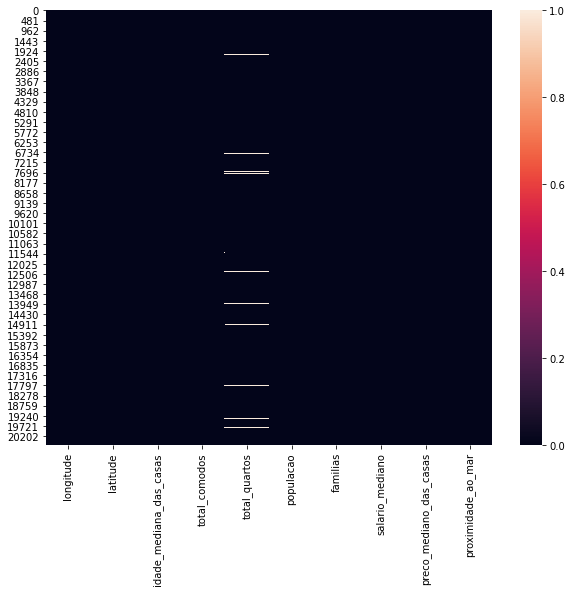

In [ ]:
plt.figure(figsize = [10,8])
sns.heatmap(df.isnull())
plt.show;


Distribuição estatística dos dados

In [ ]:
df.describe()

,longitude,latitude,idade_mediana_das_casas,total_comodos,total_quartos,populacao,familias,salario_mediano,preco_mediano_das_casas
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Abaixo, vamos analisar a __correlação__ das variáveis explicativas com a variável target:


In [ ]:
df.corr()['preco_mediano_das_casas']

longitude                 -0.045967
latitude                  -0.144160
idade_mediana_das_casas    0.105623
total_comodos              0.134153
total_quartos              0.049686
populacao                 -0.024650
familias                   0.065843
salario_mediano            0.688075
preco_mediano_das_casas    1.000000
Name: preco_mediano_das_casas, dtype: float64

Abaixo, vamos verificar graficamente.
 

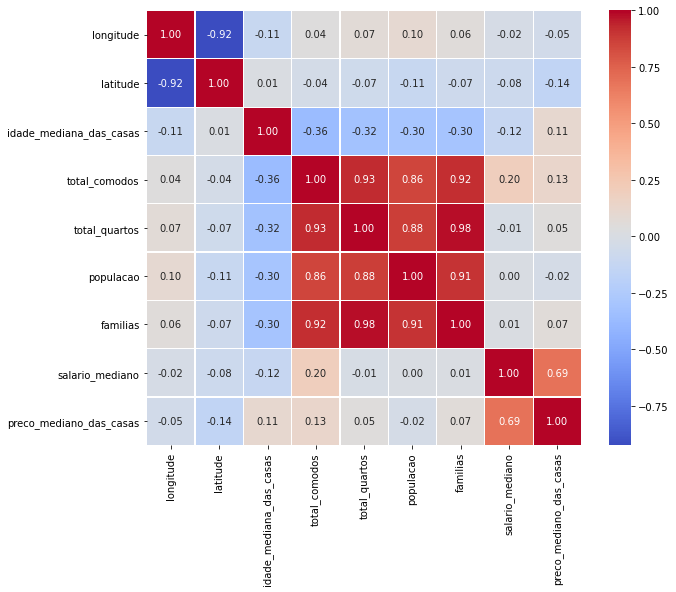

In [ ]:
plt.figure(figsize = [10,8])
sns.heatmap(df.corr(), cmap = 'coolwarm', fmt = '.2f', lw = 0.1,
            vmax = 1.0, square = True, linecolor = 'white', annot = True);

Vemos que a variável salario_mediano possui uma alta correlação com a variável target, perto de 0.7.
Isso é intuitivo, pois população com salário maiores tendem a morar em regiões mais caras. 

Vejamos abaixo um gráfico de dispersão entre essas duas variáveis.


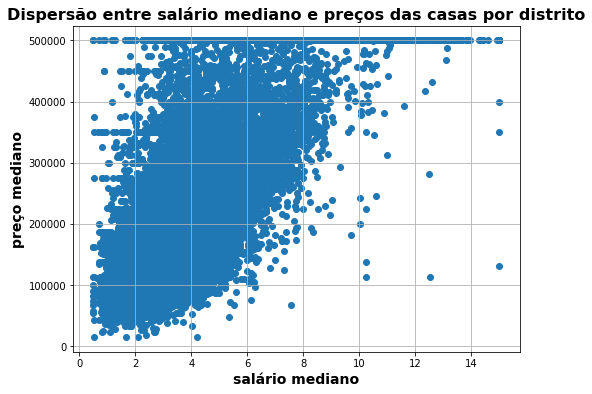

In [ ]:
plt.figure(figsize = [8,6])
plt.scatter(df.salario_mediano, df.preco_mediano_das_casas)
plt.title('Dispersão entre salário mediano e preços das casas por distrito', fontsize = 16, fontweight = 'bold')
plt.xlabel('salário mediano', fontsize = 14, fontweight = 'bold')
plt.ylabel('preço mediano', fontsize = 14, fontweight = 'bold')
plt.grid()
plt.show;

O gráfico acima ilustra bem uma alta relação linear entre as duas variáveis.

## __Preparação dos dados para os modelos de aprendizado de máquina__

Vamos começar dividindo nossos dados nos conjuntos de treinamento e teste.

In [ ]:
df_train, df_test = train_test_split(df, test_size = 0.25, random_state = 0)
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(20640, 10)
(15480, 10)
(5160, 10)


Vamos trabalhar com três etapas do processamento de modelagem:


1.   Tratamento de variáveis categóricas
2.   Normalização dos dados
3.   Tratamento de valores faltantes



In [ ]:
#importando bibliotecas
from sklearn.preprocessing import OneHotEncoder, StandardScaler

Tratamento de variáveis categóricas

<br>

No nosso problema, a única variável categórica é a "proximidade_ao_mar" e iremos tratá-la com a técnica OHE (ONE HOT ENCODING)

In [ ]:
df.proximidade_ao_mar.value_counts()

<1H OCEANO       9136
INTERIOR         6551
PERTO OCEANO     2658
PERTO DA BAÍA    2290
ILHA                5
Name: proximidade_ao_mar, dtype: int64

In [ ]:
#instanciando o modelo 
cat_encoder = OneHotEncoder()

#treinando e transformando

df_prox_mar_OHE = cat_encoder.fit_transform(df[['proximidade_ao_mar']]).toarray()
df_prox_mar_OHE

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEANO', 'ILHA', 'INTERIOR', 'PERTO DA BAÍA', 'PERTO OCEANO'],
       dtype=object)]

Normalização dos dados

In [ ]:
#instanciando o modelo
sc = StandardScaler()

In [ ]:
variaveis_para_normalizar = ['latitude',
                             'longitude',
                             'idade_mediana_das_casas',
                             'total_comodos',
                             'total_quartos',
                             'populacao',
                             'familias',
                             'salario_mediano']

In [ ]:
#trainando e transformando o modelo nos dados
sc.fit_transform(df[variaveis_para_normalizar])

array([[ 1.05254828, -1.32783522,  0.98214266, ..., -0.9744286 ,
        -0.97703285,  2.34476576],
       [ 1.04318455, -1.32284391, -0.60701891, ...,  0.86143887,
         1.66996103,  2.33223796],
       [ 1.03850269, -1.33282653,  1.85618152, ..., -0.82077735,
        -0.84363692,  1.7826994 ],
       ...,
       [ 1.77823747, -0.8237132 , -0.92485123, ..., -0.3695372 ,
        -0.17404163, -1.14259331],
       [ 1.77823747, -0.87362627, -0.84539315, ..., -0.60442933,
        -0.39375258, -1.05458292],
       [ 1.75014627, -0.83369581, -1.00430931, ..., -0.03397701,
         0.07967221, -0.78012947]])

Tratamento de valores faltantes

Vejamos abaixo a distribuição da quantidade de valores faltantes por cada variável no dataset:

In [ ]:
df.isnull().sum()

longitude                    0
latitude                     0
idade_mediana_das_casas      0
total_comodos                0
total_quartos              207
populacao                    0
familias                     0
salario_mediano              0
preco_mediano_das_casas      0
proximidade_ao_mar           0
dtype: int64

Neste problema iremos apenas exlcluir as linhas que possuam valores faltantes:

In [ ]:
df_sem_null = df.dropna(axis = 0) 
df_sem_null.shape, df.shape

((20433, 10), (20640, 10))

Vemos acima que o dataset "df_sem_null" está com 207 linhas a menos do que o "df", justamente as linhas que haviam valores faltantes e foram exluídas.

<br>

Tendo discutido todas essas etapas de preprocessamento dos dados, vamos __encapsular__ essas etapas numa função única de processamento dos dados, a fim de automatizar esse processo:

In [ ]:
def preprocessamento_completo(df, dataset_de_treino = True, cat_encoder = None, std_scaler = None):

    dff = df.copy()

    #retirando valores faltantes
    dff = dff.dropna(axis = 0 )

    variaveis_para_normalizar = ['latitude',
                                 'longitude',
                                 'idade_mediana_das_casas',
                                 'total_comodos',
                                 'total_quartos',
                                 'populacao',
                                 'familias',
                                 'salario_mediano']

    if dataset_de_treino:

        #OHE
        encoder = OneHotEncoder()
        df_prox_mar_OHE = encoder.fit_transform(dff[['proximidade_ao_mar']]).toarray()   

        #normalização
        sc = StandardScaler()
        variaveis_norm = sc.fit_transform(dff[variaveis_para_normalizar])

        X, y = np.c_[df_prox_mar_OHE, variaveis_norm], dff.preco_mediano_das_casas.values
        return X, y, encoder, sc

    else:
        #OHE
        df_prox_mar_OHE = cat_encoder.transform(dff[['proximidade_ao_mar']]).toarray()
        
        #normalização
        variaveis_norm = std_scaler.transform(dff[variaveis_para_normalizar]) 
        
        X, y =  np.c_[df_prox_mar_OHE, variaveis_norm], dff.preco_mediano_das_casas.values
        return X, y

In [ ]:
Xtrain, ytrain, encoder_train, scaler_train = preprocessamento_completo(df = df_train,
                                                                        dataset_de_treino = True,
                                                                        cat_encoder = None,
                                                                        std_scaler = None)

In [ ]:
Xtrain.shape, ytrain.shape, df_train.shape

((15331, 13), (15331,), (15480, 10))

Veja que a dimensão de Xtrain e df_train estão diferentes!

De fato, foi aplicado one-hot-encoding, o que aumenta a dimensão do dataset.

Abaixo, iremos aplicar as transformações no dataset de teste - dataset que iremos usar apenas no final do notebook, após a escolha do modelo de aprendizado de máquina final.

In [ ]:
Xtest, ytest = preprocessamento_completo(df = df_test,
                                         dataset_de_treino = False,
                                         cat_encoder = encoder_train,
                                         std_scaler = scaler_train)

In [ ]:
Xtest.shape, ytest.shape, df_test.shape

((5102, 13), (5102,), (5160, 10))

### Construção do Modelo e Avaliação

Agora, vamos criar grid_search com KNN's, Random Forests e GradientBoostings e retorne o melhor modelo.

In [ ]:
#importando as bibliotecas
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

1 - grid_search com KNN's

In [ ]:
#definindo o estimador base
estimador_base = KNeighborsRegressor()

#definindo o dicionario de parâmentros do modelo
params_KNN = {'n_neighbors':[1,2,10]}

In [ ]:
grid_search = GridSearchCV(estimator = estimador_base,
                           param_grid = params_KNN,
                           scoring = 'r2',
                           cv = 3)
grid_search 

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 10]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='r2', verbose=0)

In [ ]:
#treinando o grid_search nos dados
grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=3, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 10]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='r2', verbose=0)

In [ ]:
grid_search.best_params_

{'n_neighbors': 10}

In [ ]:
grid_search.best_score_

0.7189465743850159

In [ ]:
grid_search.best_estimator_

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                    weights='uniform')

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([0.02354773, 0.01651661, 0.01695212]),
 'mean_score_time': array([0.10357674, 0.12427409, 0.23070335]),
 'mean_test_score': array([0.56664781, 0.65894463, 0.71894657]),
 'param_n_neighbors': masked_array(data=[1, 2, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 10}],
 'rank_test_score': array([3, 2, 1], dtype=int32),
 'split0_test_score': array([0.58102692, 0.66145012, 0.72601463]),
 'split1_test_score': array([0.54309985, 0.64887048, 0.70534663]),
 'split2_test_score': array([0.57581665, 0.66651328, 0.72547846]),
 'std_fit_time': array([0.00785616, 0.000314  , 0.0002303 ]),
 'std_score_time': array([0.00231645, 0.00061461, 0.01793159]),
 'std_test_score': array([0.01678623, 0.00741733, 0.0096191 ])}

Com o algoritmo KNN obtivemos um R2 de 0.7189465743850159

2 - grid_search com Random Forests 

In [ ]:
#definindo o estimador base
estimador_base = RandomForestRegressor()

#definindo o dicionario de parâmetros do modelo
params_RF = {'n_estimators':[10,1000], 'max_depth':[2,10]}

In [ ]:
grid_search = GridSearchCV(estimator = estimador_base,
                           param_grid = params_RF,
                           scoring = 'r2',
                           cv = 3)
grid_search

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
#treinando o grid_search nos dados

grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 1000}

In [ ]:
grid_search.best_score_

0.7795297579875365

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([ 0.12215074, 11.10597308,  0.43212581, 43.38963906]),
 'mean_score_time': array([0.00297292, 0.18462785, 0.00684452, 0.54798102]),
 'mean_test_score': array([0.51243605, 0.51466486, 0.76705895, 0.77952976]),
 'param_max_depth': masked_array(data=[2, 2, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 1000, 10, 1000],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2, 'n_estimators': 10},
  {'max_depth': 2, 'n_estimators': 1000},
  {'max_depth': 10, 'n_estimators': 10},
  {'max_depth': 10, 'n_estimators': 1000}],
 'rank_test_score': array([4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.51629323, 0.51945441, 0.76579499, 0.7789706 ]),
 'split1_test_score': array([0.50532431, 0.50705731, 0.75998264, 0.76943493]),
 'split2_test_score': array([0.51569063, 0.51748284, 0.7753

Com o algoritmo Random Forest obtivemos um R2 de 0.77966897660379

3 - grid_search com GradientBoostings

In [ ]:
#definindo o estimador base
estimador_base = GradientBoostingRegressor()

#definindo o dicionario de parâmetros do modelo
params_GB = {'n_estimators':[10,1000]}

In [ ]:
grid_search = GridSearchCV(estimator = estimador_base,
                           param_grid = params_GB,
                           scoring = 'r2',
                           cv = 3)

In [ ]:
#treinando o grid_search nos dados
grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=3, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [ ]:
grid_search.best_params_

{'n_estimators': 1000}

In [ ]:
grid_search.best_score_

0.8191331629911573

In [ ]:
grid_search.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
grid_search.cv_results_

{'mean_fit_time': array([ 0.23152169, 22.11532124]),
 'mean_score_time': array([0.00232538, 0.06588721]),
 'mean_test_score': array([0.52748371, 0.81913316]),
 'param_n_estimators': masked_array(data=[10, 1000],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10}, {'n_estimators': 1000}],
 'rank_test_score': array([2, 1], dtype=int32),
 'split0_test_score': array([0.53476805, 0.81842574]),
 'split1_test_score': array([0.51882906, 0.81512422]),
 'split2_test_score': array([0.52885402, 0.82384953]),
 'std_fit_time': array([0.00673697, 0.06588236]),
 'std_score_time': array([0.00039466, 0.00342524]),
 'std_test_score': array([0.00657881, 0.00359704])}

Com o algoritmo GradientBoosting obtivemos um R2 de 0.8192576561666219

Vamos que o modelo GradientBoosting obteve o melhor R2.

__Exercício 2:__ Crie uma classe para comparar o grid_search dentre vários modelos distintos.
    
    
Essa classe, gridSearchAll(), já está pré-desenvolvida no código abaixo. O exercício consiste de __completar essa classe.__ Para isso, crie o métodos fit_all, que irá treinar, usando grid_search, todos os grids que tenham sido pré-construídos e inseridos na classe.
Ainda, a quantidade de folds para a validação cruzada no grid_search deve ser implementada no método construtor da classe, bem como qual a métrica de performance a ser avaliada. 
Finalmente, salve o melhor modelo de cada grid e tenha um método best_all_grid_models que retorna o melhor modelo dentre todos os grids.

In [ ]:
class gridSearchAll():
    
    def __init__(self, estimator, param_grid, scoring='r2', cv=3):
        self.__estimator = estimator
        self.__param_grid = param_grid
        self.__scoring = scoring
        self.__cv = cv
        self.__grid_models = []
        self.__fits = []
        self.__best_scores = []
        self.__best_estimators = []
        
    @property
    def estimator(self):
        return self.__estimator
    
    @property
    def param_grid(self):
        return self.__param_grid
    
    @property
    def scoring(self):
        return self.__scoring
    
    @property
    def cv(self):
        return self.__cv
    
    @property
    def grid_models(self):
        return self.__grid_models
    
    @property
    def fits(self):
        return self.__fits
    
    @property
    def best_scores(self):
        return self.__best_scores
    
    @property
    def best_estimators(self):
        return self.__best_estimators
    
    def insert_model(self):
        
        for i in self.__estimator:
            indice = self.__estimator.index(i)
            grid = GridSearchCV(estimator = i, param_grid = self.__param_grid[indice], scoring = self.__scoring, cv = self.__cv)
            self.__grid_models.append(grid)
        return self.__grid_models
        
    def fit_all(self, X, y):
        
        self.insert_model()
        for i in self.__grid_models:
            treinado = i.fit(X, y)
            melhor_estimador = treinado.best_estimator_
            melhor_score = treinado.best_score_
            self.__fits.append(treinado)
            self.__best_estimators.append(melhor_estimador)
            self.__best_scores.append(melhor_score)
        return self.__fits       
    
    def best_all_grid_models(self):
        
        max_score = max(self.__best_scores)
        indice = self.__best_scores.index(max_score)
        best_model = self.__best_estimators[indice]
        
        return f'Melhor estimador: {best_model}\nScore: {max_score}'
    
    def best_analysis(self):
        for i in self.__estimator:
            estimador = i
            indice = self.__estimator.index(i)
            melhor_configuracao = self.__best_estimators[indice]
            melhor_score = self.__best_scores[indice]
            print(f'Estimador: {estimador}\nMelhor configuração: {melhor_configuracao}\nMelhor score: {melhor_score}\n_______') 

In [ ]:
estimador = [RandomForestRegressor(), KNeighborsRegressor(), GradientBoostingRegressor()]
param_grid = [{"n_estimators":[10,1000], 
           "max_depth":[3,10]}, {"n_neighbors":[5, 20, 100]}, 
          {'n_estimators':[100, 1000], 'max_depth': [3, 10]}]         

In [ ]:
gd = gridSearchAll(estimator=estimador, param_grid=param_grid)

In [ ]:
gd.fit_all(Xtrain, ytrain)

[GridSearchCV(cv=3, error_score=nan,
              estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                              criterion='mse', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=None,
                                              verbose=0, warm_start=False),
              iid='de

In [ ]:
gd.best_all_grid_models()

"Melhor estimador: GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',\n                          init=None, learning_rate=0.1, loss='ls', max_depth=3,\n                          max_features=None, max_leaf_nodes=None,\n                          min_impurity_decrease=0.0, min_impurity_split=None,\n                          min_samples_leaf=1, min_samples_split=2,\n                          min_weight_fraction_leaf=0.0, n_estimators=1000,\n                          n_iter_no_change=None, presort='deprecated',\n                          random_state=None, subsample=1.0, tol=0.0001,\n                          validation_fraction=0.1, verbose=0, warm_start=False)\nScore: 0.81904186483324"

In [ ]:
gd.best_estimators

[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=1000, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform'),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
 

In [ ]:
gd.best_scores

[0.7796020259143926, 0.7130354902466814, 0.81904186483324]

In [ ]:
gd.estimator

[RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False),
 KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'),
 GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                           init=None, learning_rate=0.1, loss='ls', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
 

__Exercício 3:__ Usando a classe criada, analise novamente os modelos criados no exercício 1.

In [ ]:
gd.best_analysis()

Estimador: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
Melhor configuração: RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verb

Análizando o melhor estimador na melhor configuração:

In [ ]:
GB = GradientBoostingRegressor(n_estimators = 1000, max_depth = 10)

In [ ]:
GB.fit(Xtrain, ytrain)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=10,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
ypred_GB = GB.predict(Xtrain)

In [ ]:
from sklearn.metrics import r2_score, accuracy_score
r2_score(ytrain, ypred_GB)


0.9999735189333787

In [ ]:
ypred_GB2 = GB.predict(Xtest)

In [ ]:
r2_score(ytest, ypred_GB2)

0.8335698866043114

O Gradient Boosting Regressor apresentou um resultado melhor até nos dados de teste.

Conclusão: Nosso modelo generalizou muito bem!